# SEMINAR - Topic 7 (Phân tích dữ liệu thông minh - CQ2018/21)

### Giảng viên: Nguyễn Tiến Huy

__Thông tin nhóm__:

> STT: 12

> Thành viên:
* Đặng Hữu Thắng - MSSV: 18120555 (Nhóm trưởng)
* Nguyễn Trung Thành - MSSV: 18120565
* Phạm Xuân Thành - MSSV: 18120567
* Đặng Minh Thọ - MSSV: 18120579
* Phạm Đình Thục - MSSV: 18120584

## Giới thiệu chung

Đây là cuộc thi trên Kaggle về dự đoán giá nhà, với dữ liệu là thông tin các ngôi nhà ở thành phố Ames, bang Iowa, Mỹ. Dữ liệu này được cung cấp bởi Dean De Cock cho mục đích giảng dạy và học tập.

Link cuộc thi: [House Prices - Advanced Regression Techniques](https://www.kaggle.com/c/house-prices-advanced-regression-techniques/overview)

Hình thức đánh giá: Dùng độ lỗi **Root-Mean-Squared-Error (RMSE)** với *log*(giá trị dự đoán) và *log*(giá trị thực tế)

![RMSE](https://solieu.vip/wp-content/uploads/2020/07/cong-thuc-rmse.png)

## Import thư viện và data

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from scipy import stats
from scipy.stats import norm
from scipy.stats import skew

from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import OneHotEncoder

import warnings
warnings.filterwarnings('ignore')

In [2]:
train_df = pd.read_csv('train.csv')
test_df = pd.read_csv('test.csv')
train_df_temp = train_df.copy()

## Khám phá Dữ liệu

In [3]:
train_df_temp

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1455,1456,60,RL,62.0,7917,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,8,2007,WD,Normal,175000
1456,1457,20,RL,85.0,13175,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,MnPrv,NaN,0,2,2010,WD,Normal,210000
1457,1458,70,RL,66.0,9042,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,GdPrv,Shed,2500,5,2010,WD,Normal,266500
1458,1459,20,RL,68.0,9717,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,4,2010,WD,Normal,142125


In [4]:
# Kiểm tra dữ liệu có bị lặp
train_df_temp.duplicated().sum()

0

In [5]:
train_df_temp.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 81 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             1460 non-null   int64  
 1   MSSubClass     1460 non-null   int64  
 2   MSZoning       1460 non-null   object 
 3   LotFrontage    1201 non-null   float64
 4   LotArea        1460 non-null   int64  
 5   Street         1460 non-null   object 
 6   Alley          91 non-null     object 
 7   LotShape       1460 non-null   object 
 8   LandContour    1460 non-null   object 
 9   Utilities      1460 non-null   object 
 10  LotConfig      1460 non-null   object 
 11  LandSlope      1460 non-null   object 
 12  Neighborhood   1460 non-null   object 
 13  Condition1     1460 non-null   object 
 14  Condition2     1460 non-null   object 
 15  BldgType       1460 non-null   object 
 16  HouseStyle     1460 non-null   object 
 17  OverallQual    1460 non-null   int64  
 18  OverallC

__Nhận xét sơ lược:__
* 1460 dòng, 81 cột, trong đó __*SalePrice*__ là đặc trưng cần dự đoán
* Có missing values, và một số cột như __*PoolQC*__ thiếu rất nhiều

### Đặc trưng cần dự đoán: __*SalePrice*__

<AxesSubplot:xlabel='SalePrice', ylabel='Count'>

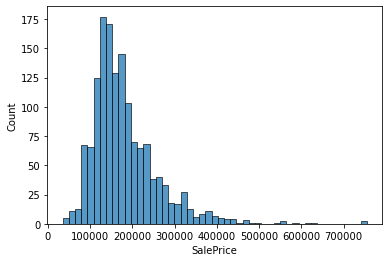

In [6]:
sns.histplot(train_df_temp['SalePrice'])

__Nhận xét về *SalePrice*__:
- Có hiện tượng bị lệch *phải* - [Skewness](https://www.analyticsvidhya.com/blog/2020/07/what-is-skewness-statistics/)
- Dữ liệu tập trung tại khoảng 100000 - 200000, đỉnh nhọn - [Kurtosis](https://towardsdatascience.com/skewness-kurtosis-simplified-1338e094fc85)

-> Dữ liệu không có dạng phân phối chuẩn *([normal distribution](https://365datascience.com/tutorials/statistics-tutorials/normal-distribution/))* -> Khắc phục bằng *[log transform](https://medium0.com/@kyawsawhtoon/log-transformation-purpose-and-interpretation-9444b4b049c9)*

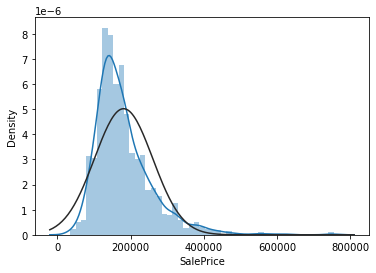

In [7]:
sns.distplot(train_df_temp['SalePrice'], fit=norm);

### Các đặc trưng khác

Sau khi đọc *data_description.txt*, có 2 điều mà mình quan tâm:
- Những đặc trưng nào sẽ có khả năng ảnh hưởng lớn đến __*SalePrice*__
- Có khá nhiều đặc trưng (không bao gồm __*SalePrice*__) có sự tương quan với nhau. VD: __*GarageArea*__ và __*GarageCars*__

Những đặc trưng sẽ có khả năng ảnh hưởng lớn đến SalePrice:
* __*Neighborhood*__: khu vực trong thành phố Ames mà ngôi nhà đó thuộc (thuộc khu phố nào, ví dụ như: Old Town, Timberland, ...)
* __*OverallQual*__: chất lượng tổng thể và độ hoàn thiện của căn nhà
* __*YearRemodAdd*__: năm tu sửa, xây thêm
* __*GrLivArea*__: diện tích sử dụng
* __*GarageArea*__: diện tích garage

Tuy nhiên, để kiểm tra, chúng ta sẽ dùng Corr()

In [8]:
# Tiến hành label encode cho các cột catogorical không ở dạng số thành số để có thể tính được corr nhằm ko bỏ sót đặc trưng nào quan trọng
obj_col = train_df_temp.dtypes[train_df_temp.dtypes == 'object'].index
label = LabelEncoder()
for col in obj_col:
    train_df_temp[col] = label.fit_transform(train_df_temp[col])

# Kiểm tra lại
train_df_temp.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 81 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             1460 non-null   int64  
 1   MSSubClass     1460 non-null   int64  
 2   MSZoning       1460 non-null   int32  
 3   LotFrontage    1201 non-null   float64
 4   LotArea        1460 non-null   int64  
 5   Street         1460 non-null   int32  
 6   Alley          1460 non-null   int32  
 7   LotShape       1460 non-null   int32  
 8   LandContour    1460 non-null   int32  
 9   Utilities      1460 non-null   int32  
 10  LotConfig      1460 non-null   int32  
 11  LandSlope      1460 non-null   int32  
 12  Neighborhood   1460 non-null   int32  
 13  Condition1     1460 non-null   int32  
 14  Condition2     1460 non-null   int32  
 15  BldgType       1460 non-null   int32  
 16  HouseStyle     1460 non-null   int32  
 17  OverallQual    1460 non-null   int64  
 18  OverallC

In [9]:
train_df_temp.corr()['SalePrice'].sort_values(ascending=False)[1:].head(20)

OverallQual     0.790982
GrLivArea       0.708624
GarageCars      0.640409
GarageArea      0.623431
TotalBsmtSF     0.613581
1stFlrSF        0.605852
FullBath        0.560664
TotRmsAbvGrd    0.533723
YearBuilt       0.522897
YearRemodAdd    0.507101
GarageYrBlt     0.486362
MasVnrArea      0.477493
Fireplaces      0.466929
BsmtFinSF1      0.386420
Foundation      0.382479
LotFrontage     0.351799
WoodDeckSF      0.324413
2ndFlrSF        0.319334
OpenPorchSF     0.315856
HalfBath        0.284108
Name: SalePrice, dtype: float64

<AxesSubplot:xlabel='OverallQual', ylabel='SalePrice'>

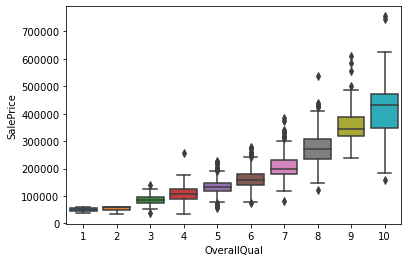

In [10]:
sns.boxplot(data=train_df_temp, x='OverallQual', y='SalePrice')

- __*OverallQual*__ càng cao thì __*SalePrice*__ càng lớn

<AxesSubplot:xlabel='GrLivArea', ylabel='SalePrice'>

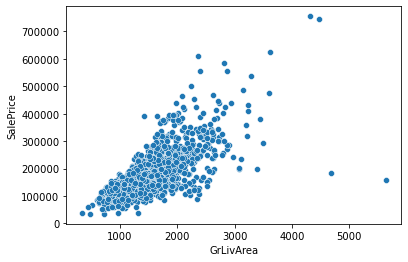

In [11]:
sns.scatterplot(data=train_df_temp, x='GrLivArea', y='SalePrice')

- __*GrLivArea*__ và __*SalePrice*__ có mối quan hệ tuyến tính
- Có 2 điểm dữ liệu ko tuân theo quan hệ này, có thể đây là *outliers*

In [12]:
outlier_index = train_df_temp[(train_df_temp['SalePrice'] < 250000) & (train_df_temp['GrLivArea'] > 4200)].index
outlier_arr = list(outlier_index)

<AxesSubplot:xlabel='GarageArea', ylabel='SalePrice'>

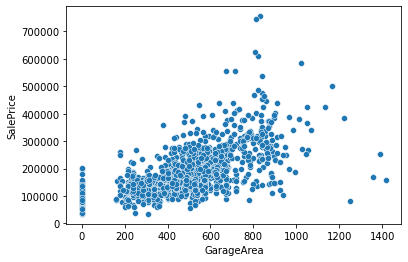

In [13]:
sns.scatterplot(data=train_df_temp, x='GarageArea', y='SalePrice')

- __*GarageArea*__ và __*SalePrice*__ có vẻ như có mối quan hệ tuyến tính
- Có vài điểm dữ liệu ko tuân theo quan hệ này, có thể đây là *outliers*
- Có 1 loạt điểm có __*GarageArea*__ = 0, có nghĩa là không có Garage

In [14]:
outlier_index = train_df_temp[(train_df_temp['SalePrice'] < 300000) & (train_df_temp['GarageArea'] > 1200)].index
outlier_arr = outlier_arr + list(outlier_index)

<AxesSubplot:xlabel='TotalBsmtSF', ylabel='SalePrice'>

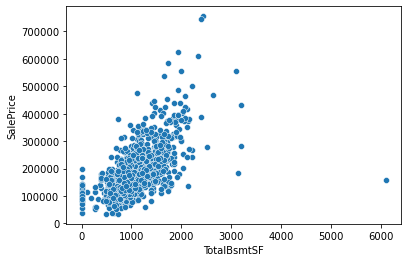

In [15]:
# Diện tích khu vực basement (tầng hầm)
sns.scatterplot(data=train_df_temp, x='TotalBsmtSF', y='SalePrice')

* Tương tự như __*GarageArea*__
* Các giá trị = 0 là không có tầng hầm

In [16]:
outlier_index = train_df_temp[(train_df_temp['SalePrice'] < 200000) & (train_df_temp['TotalBsmtSF'] > 5000)].index
outlier_arr = outlier_arr + list(outlier_index)

<AxesSubplot:xlabel='1stFlrSF', ylabel='SalePrice'>

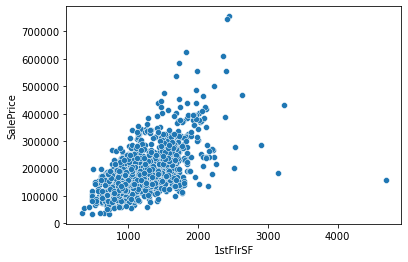

In [17]:
# Diện tích tầng 1
sns.scatterplot(data=train_df_temp, x='1stFlrSF', y='SalePrice')

In [18]:
outlier_index = train_df_temp[(train_df_temp['SalePrice'] < 200000) & (train_df_temp['1stFlrSF'] > 4000)].index
outlier_arr = outlier_arr + list(outlier_index)

In [19]:
outlier_arr = list(dict.fromkeys(outlier_arr))
outlier_arr

[523, 1298, 581, 1061, 1190]

<AxesSubplot:>

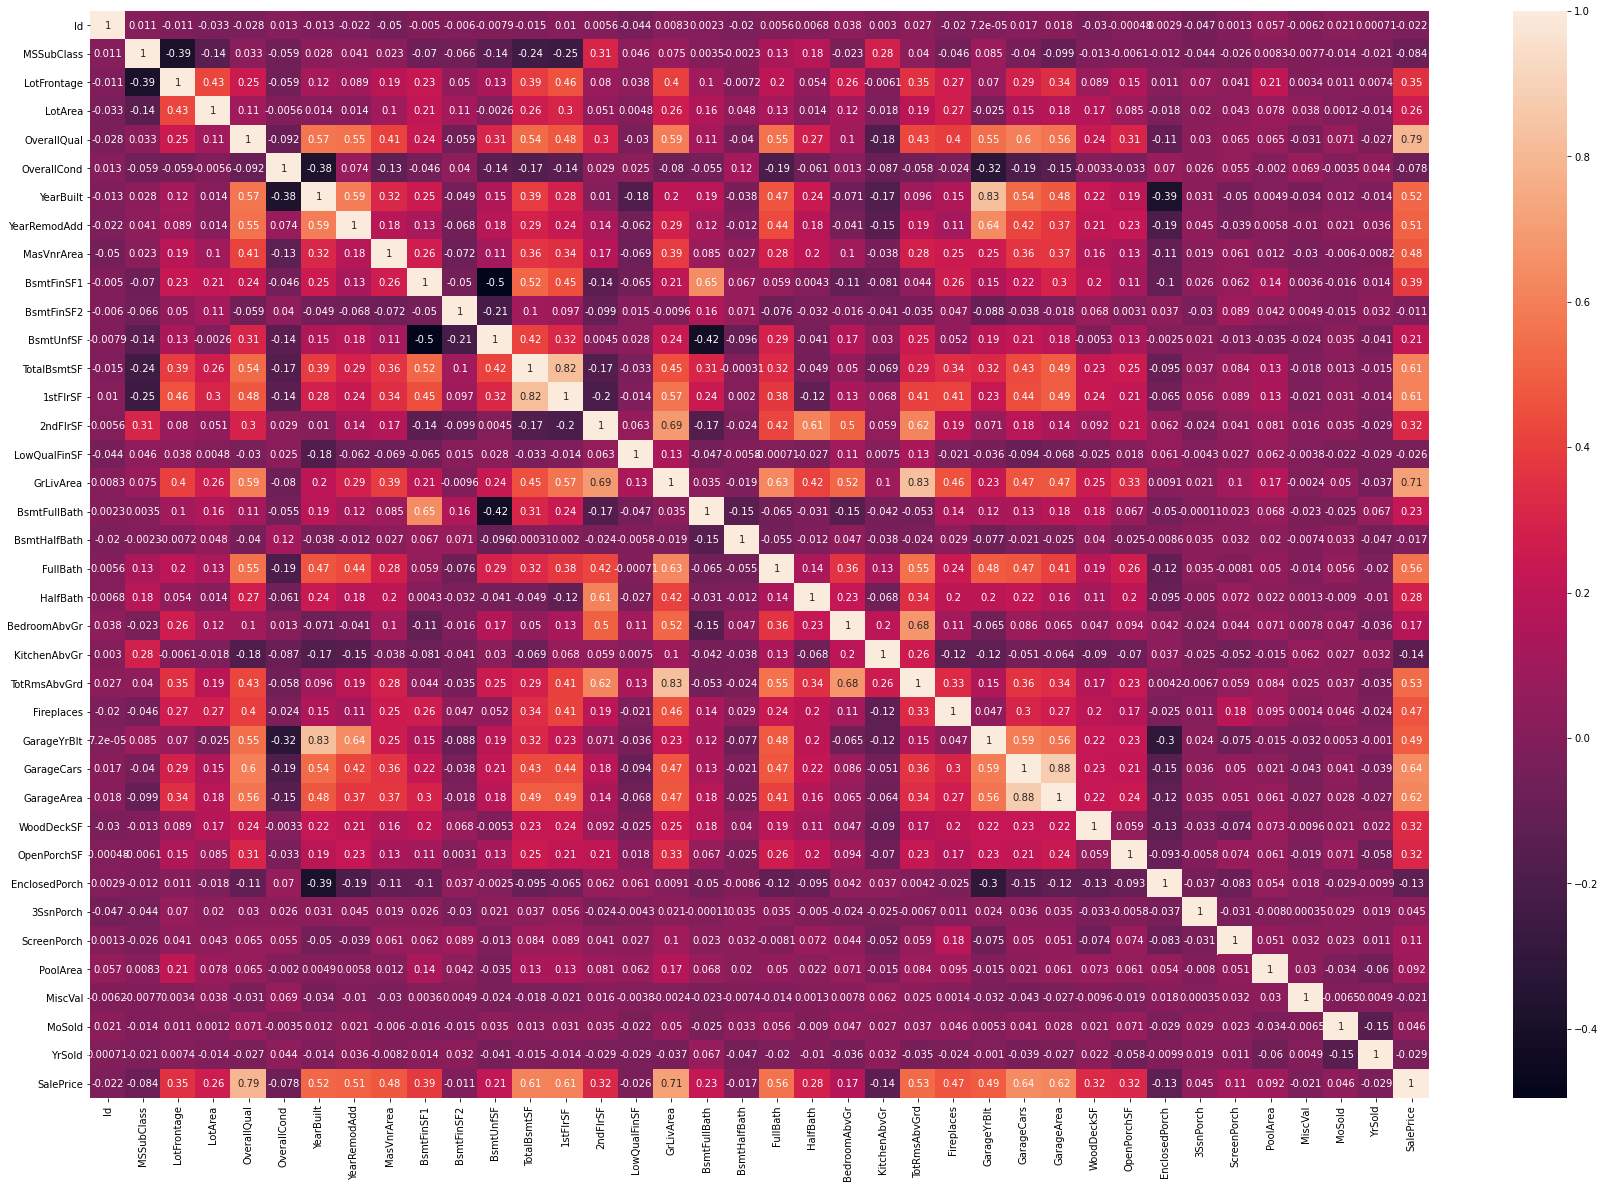

In [20]:
plt.figure(figsize=(30,20))
sns.heatmap(train_df.corr(), annot=True)

* __*GarageArea*__ và __*GarageCars*__
* __*GarageYrBlt*__ và __*YearBuilt*__
* __*TotRmsAbvGrd*__ và __*GrLivArea*__

## Preprocessing

### SalePrice

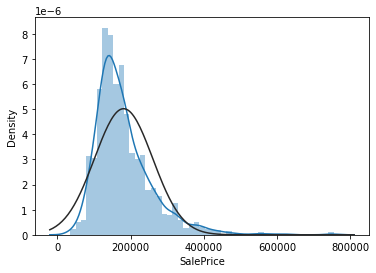

In [21]:
sns.distplot(train_df_temp['SalePrice'], fit=norm);

In [22]:
train_df_temp['SalePrice'] = np.log(train_df_temp['SalePrice'])

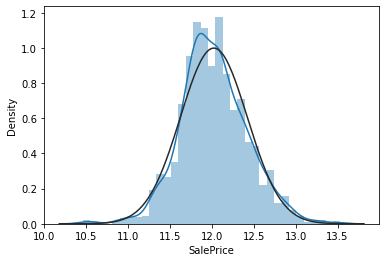

In [23]:
sns.distplot(train_df_temp['SalePrice'], fit=norm);

### Các đặc trưng khác

In [24]:
# Xóa các outliers
train_df.drop(outlier_arr, inplace=True)

y_train = np.log(train_df['SalePrice'].values)
full_df = pd.concat((train_df, test_df)).reset_index(drop=True)
full_df.drop(['SalePrice', 'Id'], axis=1, inplace=True)
full_df.shape

(2914, 79)

In [25]:
full_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2914 entries, 0 to 2913
Data columns (total 79 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   MSSubClass     2914 non-null   int64  
 1   MSZoning       2910 non-null   object 
 2   LotFrontage    2429 non-null   float64
 3   LotArea        2914 non-null   int64  
 4   Street         2914 non-null   object 
 5   Alley          198 non-null    object 
 6   LotShape       2914 non-null   object 
 7   LandContour    2914 non-null   object 
 8   Utilities      2912 non-null   object 
 9   LotConfig      2914 non-null   object 
 10  LandSlope      2914 non-null   object 
 11  Neighborhood   2914 non-null   object 
 12  Condition1     2914 non-null   object 
 13  Condition2     2914 non-null   object 
 14  BldgType       2914 non-null   object 
 15  HouseStyle     2914 non-null   object 
 16  OverallQual    2914 non-null   int64  
 17  OverallCond    2914 non-null   int64  
 18  YearBuil

In [26]:
missing_ratio = full_df.isna().sum()/len(full_df)
missing_ratio = missing_ratio.drop(missing_ratio[missing_ratio == 0].index).sort_values(ascending=False)
missing_df =  pd.DataFrame({'Missing ratio': missing_ratio})
missing_df

,Missing ratio
PoolQC,0.996911
MiscFeature,0.964310
Alley,0.932052
Fence,0.804049
FireplaceQu,0.486960
LotFrontage,0.166438
GarageFinish,0.054564
GarageQual,0.054564
GarageCond,0.054564
GarageYrBlt,0.054564


In [27]:
full_df['PoolQC'] = full_df['PoolQC'].fillna('no_pool')
full_df['MiscFeature'] = full_df['MiscFeature'].fillna('none')
full_df['Alley'] = full_df['Alley'].fillna('no_alley_access')
full_df['Fence'] = full_df['Fence'].fillna('no_fence')
full_df['FireplaceQu'] = full_df['FireplaceQu'].fillna('no_fireplace')

for col in ['GarageFinish', 'GarageQual', 'GarageCond', 'GarageType']:
    full_df[col] = full_df[col].fillna('no_garage')
for col in ['BsmtQual', 'BsmtCond', 'BsmtExposure', 'BsmtFinType1', 'BsmtFinType2']:
    full_df[col] = full_df[col].fillna('no_basement')
    
full_df["Functional"] = full_df["Functional"].fillna("typical")

In [28]:
full_df["LotFrontage"] = full_df.groupby("Neighborhood")["LotFrontage"].transform(lambda x: x.fillna(x.mean()))

In [29]:
# Không có dữ liệu -> không có garage -> điền là 0
for col in ['GarageYrBlt', 'GarageArea', 'GarageCars']:
    full_df[col] = full_df[col].fillna(0)

In [30]:
# Tương tự như trên, không có khu vực basement
for col in ['BsmtFinSF1', 'BsmtFinSF2', 'BsmtUnfSF','TotalBsmtSF', 'BsmtFullBath', 'BsmtHalfBath']:
    full_df[col] = full_df[col].fillna(0)

In [31]:
full_df["MasVnrType"] = full_df["MasVnrType"].fillna("None")
full_df["MasVnrArea"] = full_df["MasVnrArea"].fillna(0)

![masonry](https://www.researchgate.net/profile/Imrose-B-Muhit/publication/333532849/figure/fig1/AS:773548415139840@1561439722302/Typical-masonry-veneer-wall-system-details-Think-Brick-Australia.jpg)

In [32]:
# Kiểu khu vực dân cư: khu cao cấp, khu chung cư, ...
full_df['MSZoning'] = full_df['MSZoning'].fillna(full_df['MSZoning'].mode()[0])

full_df['Utilities'] = full_df['Utilities'].fillna(full_df['Utilities'].mode()[0])
full_df['Electrical'] = full_df['Electrical'].fillna(full_df['Electrical'].mode()[0])
full_df['KitchenQual'] = full_df['KitchenQual'].fillna(full_df['KitchenQual'].mode()[0])
full_df['Exterior1st'] = full_df['Exterior1st'].fillna(full_df['Exterior1st'].mode()[0])
full_df['Exterior2nd'] = full_df['Exterior2nd'].fillna(full_df['Exterior2nd'].mode()[0])
full_df['SaleType'] = full_df['SaleType'].fillna(full_df['SaleType'].mode()[0])

In [33]:
missing_ratio = full_df.isna().sum()/len(full_df)
missing_ratio = missing_ratio.drop(missing_ratio[missing_ratio == 0].index).sort_values(ascending=False)
missing_df =  pd.DataFrame({'Missing ratio': missing_ratio})
missing_df

,Missing ratio


In [34]:
numeric_cols = full_df.dtypes[full_df.dtypes != "object"].index

skewness = full_df[numeric_cols].apply(lambda x: skew(x)).sort_values(ascending=False)

skewness_df = pd.DataFrame({'Skew' :skewness})
skewness_df.head(10)

,Skew
MiscVal,21.938142
PoolArea,17.679480
LotArea,13.161619
LowQualFinSF,12.078203
3SsnPorch,11.366100
KitchenAbvGr,4.297992
BsmtFinSF2,4.142042
EnclosedPorch,4.000022
ScreenPorch,3.942711
BsmtHalfBath,3.927598


In [35]:
skewness_df = skewness_df[abs(skewness_df['Skew']) > 0.5]
skewed_features = skewness_df.index
for feat in skewed_features:
    full_df[feat] = np.log1p(full_df[feat])

In [36]:
full_df = pd.get_dummies(full_df)
full_df.shape

(2914, 302)

In [37]:
train = full_df[:train_df.shape[0]]
test = full_df[train_df.shape[0]:]

In [38]:
# 4 cái là train, y_train (đã đc log), test, không có y_test vì sẽ nộp lên kagle lấy điểm.
# muốn test local trc khi nộp thì tự chia tập train ra thành 2 tập để chạy

## Model và Predict

### RIDGE REGRESSION

#### Linear Regression: `||y - Xw||^2_2` (RSS)
#### Ridge Regression: `||y - Xw||^2_2 + alpha * ||w||^2_2`


- Hồi quy Ridge (Ridge Regression) là một thuật toán nâng cấp của thuật toán hồi quy tuyến tính (Linear Regression). 

- Sự khác biệt (nâng cấp) của Ridge so với Linear ở chỗ:
    - Ridge có thể khắc phục hiện tượng Ovefitting xảy ra ở Linear
    
    - Trong khi Linear tìm cách tối thiểu hóa (minimize) tổng bình phương phần dư (RSS), còn Ridge có thêm **`alpha * ||w||^2_2`** với alpha (alpha > 0) gọi là tham số hiệu chỉnh (tuning parameter) của mô hình
    - Tham số `alpha` thể hiện sự ưu tiên giữa các đại lượng của tập dữ liệu
    
        - `alpha` lớn: dẫn đến undefitting
        - `alpha`  nhỏ: Trở về thành Linear (dẫn đến overfitting)
    - Việc lựa chọn tham số `alpha` rất quan trọng, ở đây ta dùng phương pháp cross-validation để chọn 
    - Cross-validation được tích hợp sẵn trong RidgeCV 

In [39]:
from sklearn.linear_model import RidgeCV
from sklearn.model_selection import KFold
from sklearn.linear_model import Ridge

from sklearn.linear_model import LassoCV
from sklearn.linear_model import Lasso
from sklearn.linear_model import LinearRegression

**K-Fold CV** sẽ giúp chúng ta đánh giá một model đầy đủ và chính xác hơn khi chúng ta có một tập dữ liệu không lớn.

- Phần dữ liệu Training thì sẽ được chia ngẫu nhiên thành K phần (K là một số nguyên, hay chọn là 5 hoặc 10).
-  Sau đó train model K lần, mỗi lần train sẽ chọn 1 phần làm dữ liệu validation và K-1 phần còn lại làm dữ liệu training. 
- Kết quả đánh giá model cuối cùng sẽ là trung bình cộng kết quả đánh giá của K lần train. 

**Alpha**: Ở đây chúng ta sẽ khảo sát bộ giá trị của `alpha` = (1e-8, 1e-4, 1e-2, 1.0, 10.0, 20.0, 50.0, 100.0) để chọn ra `alpha` tốt nhất cho mô hình 

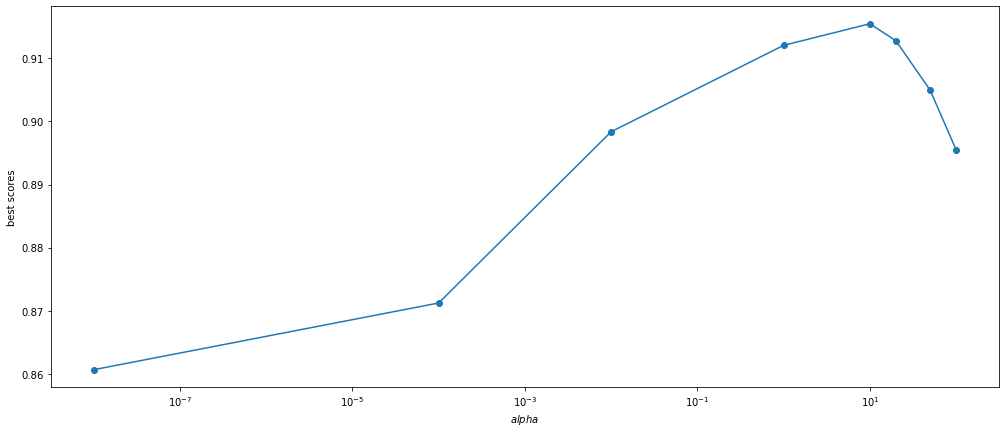

In [40]:
# Phương thức kFold
splitter = KFold(5, random_state=42, shuffle=True)

# Các giá trị alpha đại diên cần kiểm tra
alps = [1e-8, 1e-4, 1e-2, 1.0, 10.0, 20.0, 50.0, 100.0]
scores =  np.array([])
for alp in alps:
    tmpRidge = RidgeCV(alphas=(alp, alp), cv=splitter)
    tmpRidge.fit(train, y_train)
    scores= np.append(scores, [tmpRidge.best_score_])

scores = scores.transpose()

fig, ax = plt.subplots(1, 1, figsize=(17,7))
ax.plot(alps, scores, ls='-', marker='o')
ax.set_xscale('log')
ax.set_xlabel('$alpha$')
ax.set_ylabel('best scores');

Từ đồ thị, ta có thê thấy hàm đạt `best score` cao nhất xấp xỉ 0.92 tại `alpha` bằng 10.0.

### **Dự đoán**: **`alpha = 10.0`** là giá trị cần tìm

## **Tiếp theo ta tiến hành tìm tham số `alpha` tốt nhất**

*  So khớp trên tập train bằng phương pháp Cross-validation để tìm ra tham số alpha tốt nhất

In [41]:

ridgeCV_object = RidgeCV(alphas=(1e-8, 1e-4, 1e-2, 1.0, 10.0, 20.0, 50.0, 100.0), cv=splitter)
ridgeCV_object.fit(train, y_train)

print("Best model searched:\nbest score = {}\nalpha = {}\nintercept = {}, ".format(ridgeCV_object.best_score_,
                                                                                                ridgeCV_object.alpha_,
                                                                                                 ridgeCV_object.intercept_,
                                                                                                 ))      
best_alpha = ridgeCV_object.alpha_

Best model searched:
best score = 0.9154780447599794
alpha = 10.0
intercept = 11.455515246217958, 


### Kết quả cho thấy

 - **best score = 0.9154780447599794**
 
 - **alpha = 10.0**
 
## Dự đoán kết quả trên tập test 
Từ tham số best alpha = 10.0 thu được, tiến hành dự đoán (predict) kết quả trên tập test

In [42]:
est = Ridge(alpha=best_alpha).fit(train,y_train)
ypredict_ridge_best = est.predict(test)

## Xuất CSV để submit kết quả trên Kaggle
* Sau khi đã có được kết quả dự đoán, ghi kết quả thu được vào file csv theo cú pháp quy định
* Nộp kết quả thu được lên trang chấm điểm của Kaggle, ghi lại điểm số nhận được

In [43]:
newId = test.index + 1 + len(outlier_arr)
ypredict_ridge_best = np.exp(ypredict_ridge_best)
submission_df = pd.DataFrame({'Id' : newId,
                              'SalePrice': ypredict_ridge_best})
submission_df.to_csv(r'submission.csv', index=False, header=True);

## Kết quả sau khi submit predictions trên Kaggle
- Score: 0.12536
- Rank: 2090

![result](result.png)

### Lasso regression

- Giống với Ridge Regression, Lasso Regression là một loại phân tích hồi quy sử dụng kỹ thuật chuẩn hóa L1.

- Phương pháp này sử dụng một hình phạt ảnh hưởng đến giá trị của các hệ số hồi quy. Khi hình phạt tăng nhiều hệ số trở thành số không và ngược lại.

- Lasso Regression: `(1 / (2 * n_samples)) * ||y - Xw||^2_2 + alpha * ||w||_1`

- Về mặt kỹ thuật, mô hình Lasso đang tối ưu hóa chức năng mục tiêu giống như Elastic Net với l1_ratio=1.0(không có hình phạt L2).


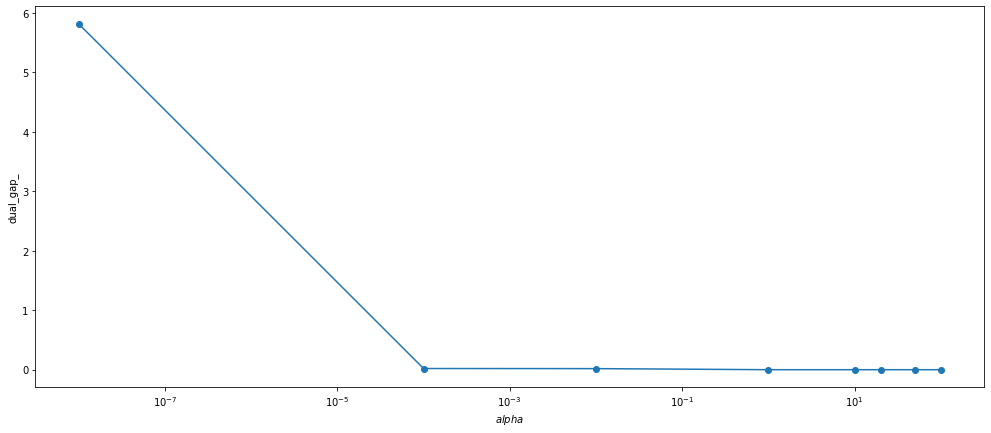

In [44]:
splitter = KFold(5, random_state=42, shuffle=True)

alps = [1e-8, 1e-4, 1e-2, 1.0, 10.0, 20.0, 50.0, 100.0]
scores =  np.array([])
for alp in alps:
    tmpLasso = LassoCV(alphas=(alp, alp), cv=splitter)
    tmpLasso.fit(train, y_train)
    scores= np.append(scores, [tmpLasso.dual_gap_])

scores = scores.transpose()

fig, ax = plt.subplots(1, 1, figsize=(17,7))
ax.plot(alps, scores, ls='-', marker='o')
ax.set_xscale('log')
ax.set_xlabel('$alpha$')
ax.set_ylabel('dual_gap_');

#### Tìm tham số alpha tốt nhất

In [45]:
lassoCV_object = LassoCV(alphas=(1e-8, 1e-4, 1e-2, 1.0, 10.0, 20.0, 50.0, 100.0), cv=splitter)
lassoCV_object.fit(train, y_train)

print("Best model searched:\ndual_gap_ = {}\nalpha = {}\nintercept = {}, ".format(lassoCV_object.dual_gap_,
                                                                                                lassoCV_object.alpha_,
                                                                                                 lassoCV_object.intercept_
                                                                                                 ))      


Best model searched:
dual_gap_ = 0.020042817588658224
alpha = 0.0001
intercept = 10.709026352121212, 


### Kết quả cho thấy

 - **dual_gap_ = 0.020042817588658224**
 
 - **alpha = 0.0001**
 
## Dự đoán kết quả trên tập test 
Từ tham số best alpha = 0.0001 thu được, tiến hành dự đoán (predict) kết quả trên tập test

In [46]:
est = Lasso(alpha=lassoCV_object.alpha_).fit(train,y_train)
ypredict_lasso_best = est.predict(test)

## Xuất CSV để submit kết quả trên Kaggle
* Sau khi đã có được kết quả dự đoán, ghi kết quả thu được vào file csv theo cú pháp quy định
* Nộp kết quả thu được lên trang chấm điểm của Kaggle, ghi lại điểm số nhận được

In [47]:
newId = test.index + 1 + len(outlier_arr)
ypredict_lasso_best = np.exp(ypredict_lasso_best)
submission_df = pd.DataFrame({'Id' : newId,
                              'SalePrice': ypredict_lasso_best})
submission_df.to_csv(r'submission1.csv', index=False, header=True);

## Kết quả sau khi submit predictions trên Kaggle
- Score: 0.12823
    

## Tài liệu tham khảo

__Tiền Xử lí:__
* Document của các thư viện pandas, numpy, sklearn, ...
* [Skewness and kurtosis](https://towardsdatascience.com/skewness-kurtosis-simplified-1338e094fc85)
* [Comprehensive data exploration with Python](https://www.kaggle.com/pmarcelino/comprehensive-data-exploration-with-python)
* [Regularized Linear Models](https://www.kaggle.com/apapiu/regularized-linear-models)
* [A study on Regression applied to the Ames dataset](https://www.kaggle.com/juliencs/a-study-on-regression-applied-to-the-ames-dataset)
* [365 Data Science - Statistics Tutorial](https://youtu.be/wDAd_QHKoOg?list=PLaFfQroTgZnyxGm6hz4lWLaMbslG0KDSG)

__Ridge Regression:__
* https://www.youtube.com/watch?v=XEo7cV-rfnw&list=PLpDNYPX7w1RYeDSr3q0EJA978jjuMz4TX&index=16
* https://harvard-iacs.github.io/2018-CS109A/labs/lab-5/solutions/
* https://scikit-learn.org/stable/modules/generated/sklearn.linear_model.RidgeCV.html
* https://scikit-learn.org/stable/modules/generated/sklearn.linear_model.Ridge.html

__Lasso Regression:__
* https://scikit-learn.org/stable/modules/generated/sklearn.linear_model.LassoCV.html
* https://scikit-learn.org/stable/modules/generated/sklearn.linear_model.Lasso.html

## Câu hỏi

__Câu hỏi 1:__ Trong quá trình tiền xử lí, có 1 vài cột categorical dạng chữ như __*Street*__ hay __*Condition2*__ có phân phối dữ liệu bị lệch rất nhiều như giá trị *Pave* ở đặc trưng __*Street*__ chiếm tới 99,6%, vậy việc này có gây ra vấn đề gì không?

__Câu hỏi 2:__ Trong bài làm có cho ra kết quả là alpha = 10, 10 ở đây thể hiện điều gì, và để giải thuật được tối ưu thì nhóm có lời khuyên gì cho nhóm của tụi mình?

__Câu hỏi 2:__ Chúng ta có thể làm gì để tối ưu hóa thuật toán?